In [1]:
import requests
import random
import matplotlib.pyplot as plt
import pandas as pd
from citipy import citipy
from apikeys import owm_api as api_key
from pprint import pprint

# Observable Trends

1. Out of the 5000 random cities pulled from the 'citipy' module, 4678 were identified by the OpenWeatherMap API. These cities are skewed towards the northern latitudes, which makes sense as that is where a greater proportion of the human cities are located.

2. Global temperatures increase as you move towards latitude 0 degrees. 

3. While wind speeds in cities around the globe range from 0 - 12 km/h, the majority of wind speeds is < 4 km/h. 

In [2]:
help(citipy)

Help on module citipy.citipy in citipy:

NAME
    citipy.citipy

CLASSES
    builtins.object
        City
    
    class City(builtins.object)
     |  City wraps up the info about a city, including its name, coordinates,
     |  and belonging country.
     |  
     |  Methods defined here:
     |  
     |  __init__(self, city_name, country_code)
     |      Initialize self.  See help(type(self)) for accurate signature.
     |  
     |  ----------------------------------------------------------------------
     |  Data descriptors defined here:
     |  
     |  __dict__
     |      dictionary for instance variables (if defined)
     |  
     |  __weakref__
     |      list of weak references to the object (if defined)

FUNCTIONS
    nearest_city(latitude, longitude)

DATA
    WORLD_CITIES_DICT = {(-54.8, -68.3): <citipy.citipy.City object>, (-53...
    c = <citipy.citipy.City object>
    cities = <_csv.reader object>
    city = ['zw', 'zvishavane', '-20.3333333', '30.0333333']
    city_

In [3]:
city_coordinates = [*citipy.WORLD_CITIES_DICT]
random_city_coordinates = random.sample(city_coordinates, 5000)
random_city_coordinates

[(48.778882, 2.317807),
 (29.103513, 70.325038),
 (56.605854, 57.766856),
 (9.866667, 77.7),
 (16.283333, -97.816667),
 (45.783333, 23.183333),
 (11.4737, 124.5133),
 (34.7152778, -81.6238889),
 (1.933891, -77.302531),
 (56.5205, 50.6818),
 (47.606333, 17.200244),
 (9.983333, 123.583333),
 (6.0088, 120.9074),
 (46.616667, 21.516667),
 (47.259267, 35.319529),
 (45.920277, 6.687651),
 (38.6786111, -121.2247222),
 (15.25, 75.533333),
 (63.6, -135.916667),
 (-2.55, -44.05),
 (43.7333333, 7.4166667),
 (15.3375, -91.026944),
 (3.992185, -76.239261),
 (54.2111, 72.9651),
 (60.016667, 11.216667),
 (14.096499, 120.80217),
 (13.2681, 122.0415),
 (6.236111, 125.020556),
 (54.9163, 61.4586),
 (31.14607, 118.57069),
 (41.030833, 39.003056),
 (35.5, 23.9666667),
 (-23.05, -49.166667),
 (40.5530556, -79.7575),
 (35.394722, 116.088333),
 (-5.916667, -35.25),
 (37.6786111, -122.0447222),
 (32.8808333, -97.1547222),
 (50.916667, 8.533333),
 (43.95, -78.3),
 (53.675556, 34.187222),
 (41.153559, -8.411779

In [4]:
cities = []
for coordinates in random_city_coordinates:
    lat, lon = coordinates
    cities.append(citipy.nearest_city(lat, lon))
city_names = []
for city in cities:
    name = city.city_name
    city_names.append(name)

In [5]:
city_names[0]

'bourg-la-reine'

In [6]:
# Build URL
url = "http://api.openweathermap.org/data/2.5/weather"
query_params = {
    'appid': api_key,
    'units': 'metric'
}
cit = []
lat = []
temp = []
humd = []
winds = []
cloud = []

for city in city_names:
    try:
        query_params['q'] = city
        response = requests.get(url, params=query_params).json()
        cit.append(response['name'])
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        humd.append(response['main']['humidity'])
        winds.append(response['wind']['speed'])
        cloud.append(response['clouds']['all'])
        print(f"{url}?units=metric&APPID={api_key}&q={city}")
    except: KeyError

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=bourg-la-reine
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=rajanpur
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=krasnoufimsk
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=elumalai
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=beriu
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=union
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=leiva
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=malmyzh
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=farad
http://api.op

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=hanover
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=tarpon springs
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=putevka
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=yuzhnyy-kospashskiy
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=sageata
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=kall
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=oberengstringen
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=flandes
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=gan

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=el rosario
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=isthmia
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=bashmakovo
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=bundaberg
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=san miguel
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=sanbu
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=novoleushkovskaya
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=burbank
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=kumeny
h

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=palo alto
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=avarua
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=lubaczow
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=catemaco
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=greenville
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=hove
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=hatton
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=cardona
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=tomakomai
http://api.open

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=dedenevo
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=mtwara
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=jaclupan
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=adancata
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=letohrad
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=otaru
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=jilemnice
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=jalor
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=grafton
http://api.openwea

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=udine
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=kristiansand
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=tenamaxtlan
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=szod
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=arcelia
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=north new hyde park
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=mynay
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=turgenevo
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=juventino r

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=mayaguez
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=balaghat
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=vienna
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=corinth
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=carayao
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=cha grande
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=novopskov
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=heerde
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=ofunato
http://api.ope

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=maple valley
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=ganjam
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=guintubhan
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=alipur chatha
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=noicattaro
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=donskoye
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=ronnede
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=lipany
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=villa union

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=bom jesus da lapa
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=cabacao
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=loknya
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=montmorency
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=san carlos
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=jacqueville
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=maniakoi
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=berezovyy
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=sant

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=gemunden
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=guinope
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=chichihualco
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=hosdurga
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=balc
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=douala
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=yacopi
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=banaba
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=huntington
http://api.open

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=porsa
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=brotas
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=tomsk
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=santa maria a monte
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=karatsu
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=peris
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=marchena
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=herzogenburg
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=patulul
http://a

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=les ponts-de-ce
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=santiago
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=grenchen
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=barcanesti
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=santa cruz cabralia
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=teluknaga
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=novoblagodarnoye
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=inhumas
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd6

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=soliera
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=kaprijke
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=tatarbunary
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=little baguio
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=huntington park
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=giulvaz
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=phitsanulok
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=larkspur
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=pal

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=gardendale
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=bulanon
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=baripada
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=saint-jean-de-braye
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=san antonio
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=lokomotivnyy
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=plainview
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=stayner
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=haghartsin
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=vavatenina
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=porto empedocle
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=sava
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=castelu
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=steinau
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=maddaloni
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=voghera
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=warren
http://

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=ponte de sor
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=oia
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=iralaya
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=dumbrava rosie
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=caloundra
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=west odessa
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=tonneins
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=batie
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=gaya
http://ap

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=novoseleznevo
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=stochov
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=kamifukuoka
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=napasar
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=mamit
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=marquetalia
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=delitzsch
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=curtici
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=alblasserdam


http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=basirhat
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=san gabriel
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=gramsh
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=tkibuli
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=borba
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=guijalo
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=yara
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=roccapiemonte
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=wanning
http://api.ope

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=asha
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=san antonio del norte
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=torzhok
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=sande
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=sapernyy
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=slavonski brod
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=albeni
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=cascavel
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=anaimalai


http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=shorewood
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=saint george
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=dixon
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=sao jose dos campos
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=tigtabon
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=kibaha
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=okakarara
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=iksal
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=plean
http

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=marmande
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=manavgat
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=alhaurin el grande
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=wurselen
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=wildomar
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=badia polesine
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=simnicu de sus
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=tirnavos
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=tamluk
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=newington
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=south hill
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=rivera
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=santa maria
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=manoleasa
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=el tambo
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=lindome
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=meghraj
http://ap

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=novomikhaylovskiy
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=zdanice
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=palmeiras de goias
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=marysville
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=stanovoye
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=sesto san giovanni
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=oupeye
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=pribyslav
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfc

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=sweetwater
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=sobreda
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=zaidpur
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=jeronimo monteiro
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=bugama
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=kattivakkam
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=montegranaro
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=vilarinho
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=lude

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=cuscatancingo
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=otukpo
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=bykov
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=velika kladusa
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=corredor
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=csengele
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=oinacu
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=silveira
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=karcag
http://a

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=stebnyk
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=jandaia do sul
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=baniyas
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=bugaba
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=sendreni
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=nazran
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=svetla nad sazavou
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=hodod
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=buciumi
http

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=sami
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=axos
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=finca blanco
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=fatima
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=odicon
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=bauta
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=purikay
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=ipanema
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=rye
http://api.openweathermap.or

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=srinivaspur
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=babenhausen
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=delfzijl
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=kot radha kishan
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=looc
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=soltsy
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=donji milanovac
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=balaoang
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=zits

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=colares
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=markapur
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=qarqin
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=les cayes
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=chocaman
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=serafimovskiy
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=tetecala
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=bintawan
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=san isidro
http:

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=desur
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=baciu
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=high point
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=doljesti
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=chornobay
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=sikandarpur
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=campos gerais
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=pilisszentivan
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=teresina

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=kolodenka
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=lennik
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=ovejas
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=shugurovo
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=quthing
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=amaru
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=santa monica
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=yazoo city
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=waterville
http://a

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=beyne-heusay
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=charneca de caparica
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=uvira
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=suplac
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=rath
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=uwajima
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=sofrino
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=naustdal
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=loksa
http://a

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=nea triglia
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=martin
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=torrelavega
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=gifford
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=sappington
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=itapira
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=guabito
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=piombino
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=promissao
http:/

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=baleno
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=binucayan
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=dano
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=carnoustie
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=mezhdurechensk
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=south saint paul
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=mocuba
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=kommunar
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=krasnolesn

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=druid hills
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=tuba
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=makiling
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=zagon
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=uvarovka
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=limbazi
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=ixtapa
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=parasia
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=pedernales
http://api.openw

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=modelu
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=bangonay
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=sacalum
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=zalukokoazhe
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=moncalieri
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=struthers
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=kurchaloy
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=pali
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=belaya glina
http:

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=baker
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=kirkintilloch
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=gikongoro
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=bernal
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=pio duran
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=debre birhan
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=sungai besar
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=campo
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=ichikawa
htt

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=mogadishu
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=quesada
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=bhattiprolu
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=malakoff
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=teopisca
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=onokhoy
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=sokol
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=sikasso
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=kibungo
http://api.op

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=levelek
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=ilirska bistrica
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=nikolayevskaya
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=portsmouth
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=lopez
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=nynashamn
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=karagay
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=harlingen
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=sombre

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=maglod
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=banesti
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=novodugino
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=chaves
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=santo nino
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=kauswagan
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=malusac
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=ta khmau
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=kodigenahalli
http:/

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=siparia
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=treuchtlingen
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=bira
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=durham
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=braunau
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=roeselare
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=esperanza
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=pittsburg
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=soest
http://api.op

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=ikornnes
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=neerijnen
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=jaru
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=tagcatong
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=chancay
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=scornicesti
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=cinnaminson
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=humboldt
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=scottsbluff
http

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=media luna
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=maplewood
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=rogovatoye
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=santo nino
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=cockburn town
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=sahbuz
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=kantemirovka
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=mgarr
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=serov
ht

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=arinos
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=sobreira
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=meulebeke
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=fort wellington
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=san miguel
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=bereslavka
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=urussanga
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=pristen
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=malard
ht

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=piaseczno
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=fushe-kruje
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=canguaretama
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=rivas
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=arvi
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=sedhiou
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=bay saint louis
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=ust-kut
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=vendychany
ht

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=taldan
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=vyshkov
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=trapiche
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=kentwood
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=maluno
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=biddeford
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=tabasalu
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=white oak
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=san lucas
http://api.o

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=la concordia
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=ouro fino
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=bilokurakyne
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=pulsano
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=yacuiba
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=mesimerion
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=varda
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=shujalpur
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=ueno
http://

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=shypyntsi
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=tlaxcoapan
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=babaita
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=brebeni
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=bobrov
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=lapas
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=harlev
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=pinehurst
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=windsor
http://api.openw

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=parian
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=jhinjhana
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=sula
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=lovington
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=ketegyhaza
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=antsla
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=kaberamaido
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=leordina
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=franklin
http://api.

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=indian trail
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=jaszszentlaszlo
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=nakhon luang
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=malpe
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=voinesti
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=berzunti
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=jennings
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=belogorsk
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=tabalo

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=xixiang
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=vilia
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=burghausen
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=jalpa
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=kozachi laheri
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=cortez
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=wheaton
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=miastko
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=sitka
http://api.openw

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=las choapas
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=kulynychi
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=yaguachi
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=denzlingen
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=starkville
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=ceatalchioi
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=sainte-marie
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=batasan
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=red b

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=tolmachevo
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=auseu
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=ubud
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=prescott valley
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=bagumbayan
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=san luis
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=changuinola
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=mount pleasant
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=tugdan

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=belyye berega
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=san carlos sija
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=frosinone
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=alcala
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=buctzotz
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=pamulang
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=yalova
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=usolye-sibirskoye
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=c

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=miasskoye
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=leuteboro
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=nuwara eliya
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=santo tomas
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=new baltimore
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=stryn
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=aleksandrovka
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=nea playia
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=g

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=vught
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=puli
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=toumodi
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=kamenolomni
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=greenbelt
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=hulja
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=baldone
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=lupac
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=teno
http://api.openweathermap

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=chinacota
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=matias barbosa
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=zhifang
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=vyshneve
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=gebze
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=gaspe
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=pradopolis
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=lorain
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=kumukh
http://api.o

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=san cosme y damian
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=sao felix do xingu
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=tepetitlan
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=inongo
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=bistra
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=tucupita
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=leeton
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=lanxi
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=pardi


http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=tezu
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=balfour
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=seymour
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=aguas formosas
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=melo
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=sao raimundo das mangabeiras
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=troubky
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=aricestii-rahtivani
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68d

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=zhob
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=walferdange
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=chhaprauli
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=furstenfeld
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=el carrizo
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=starchiojd
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=guadalupe
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=fundeni
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=new panay
h

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=sapad
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=dusti
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=kashima
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=eatontown
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=dawlatabad
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=stavanger
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=zhurivka
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=spreitenbach
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=melekhovo
http://a

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=wetzlar
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=canavieiras
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=gezing
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=bovolone
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=balakhninskiy
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=talisay
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=paunesti
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=marisel
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=pinchote
http://

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=bombay
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=san marcos
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=baleshwar
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=san isidro
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=aksu
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=weston-super-mare
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=atuona
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=panitan
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=118d4bf0d9a73a0860c9bbfcd68dd75d&q=summerville
ht

In [7]:
weather_dict = {
    "City": cit,
    "Latitude": lat,
    "Temperature": temp,
    "Humidity": humd,
    "Wind Speed": winds,
    "Cloudiness": cloud   
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Cloudiness,Humidity,Latitude,Temperature,Wind Speed
0,Bourg-la-Reine,0,51,48.78,17.33,3.60
1,Rajanpur,32,60,29.10,28.15,1.96
2,Krasnoufimsk,36,83,56.60,4.70,1.16
3,Elumalai,75,94,9.86,24.00,1.46
4,Beriu,0,93,45.79,17.00,1.00


In [8]:
weather_data.to_csv('weather_data.csv', encoding='utf-8')

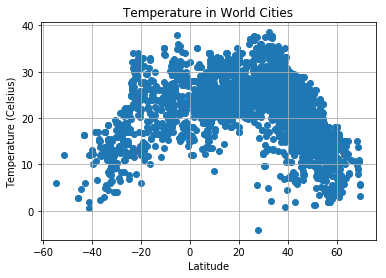

In [9]:
plt.scatter(weather_data["Latitude"], weather_data["Temperature"], marker="o")

plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("TemperatureInWorldCities.png")
plt.show()

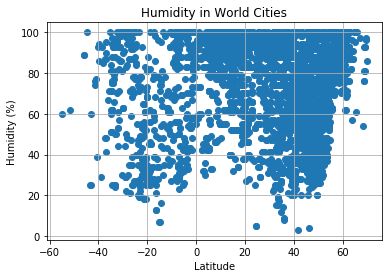

In [14]:
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], marker="o")


plt.title("Humidity in World Cities")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("HumidityInWorldCities.png")
plt.show()

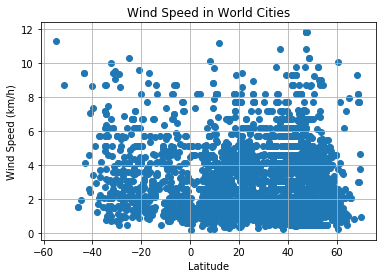

In [11]:
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], marker="o")

plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed (km/h)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("WindSpeedInWorldCities.png")
plt.show()

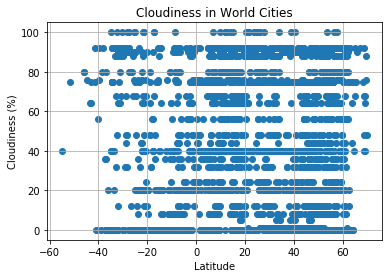

In [12]:
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], marker="o")

plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("CloudinessInWorldCities.png")
plt.show()

In [15]:
len(cit)

4678